In [1]:
import numpy as np
import random
import string
from string import punctuation
from collections import Counter
from itertools import chain, combinations

%matplotlib inline

from timeit import Timer

# Couting numbers in a list

In [2]:
# What is the big-O efficiency class?

def count(haystack, needle):
    c = 0
    for val in haystack:
        if val == needle:
            c += 1
    return c

count([5, 3, 9, 1, 5, 2, 3, 5, 3, 2, 5, 9, 3, 6, 2, 1, 7], 3)

4

# List and Set Operations

big-O class of common list and set operations:

|          | **index** | **append/add** | **delete** | **'in'** |
|----------|-------|------------|--------|------|
| **list**     | 1     | 1          | n      | n    |
| **set/dict** | --   | 1          | 1      | 1    |

# What are the common big-O classes?

In order of best to worst:

$$ O(1)      \\
O(lg(n))     \\
O(n)         \\
O(n lg(n))   \\
O(n^2)       \\
O(n^3)       \\
...          \\
O(2^n)       \\
O(n!)        \\
$$

# Pair Subset Sums (non-negative values only!)

In [3]:
values = [random.randrange(0,100) for i in xrange(4000)]

In [4]:
# What is the big-O efficiency class?

def pair_subset_sum(values, target):

    for i, a in enumerate(values):

        for j, b in enumerate(values):

            if i != j and a + b == target:
                return a, b

    return None

%time ans = pair_subset_sum(values, -1)   # try 100
print ans

CPU times: user 4.59 s, sys: 249 ms, total: 4.83 s
Wall time: 4.63 s
None


In [5]:
# What is the big-O efficiency class?

def pair_subset_sum(values, target):

    for i, a in enumerate(values):

        for b in values[i+1:]:

            if a + b == target:
                return a, b

    return None

%time ans = pair_subset_sum(values, -1)   # try 100
print ans

CPU times: user 1.31 s, sys: 29.9 ms, total: 1.34 s
Wall time: 1.32 s
None


In [6]:
# What is the big-O efficiency class?

def pair_subset_sum(values, target):
    
    value_counts = Counter(values)
    
    for val in values:
        
        diff = target - val
        
        if diff in value_counts:
            
            if diff != val:
                return val, diff
            
            elif value_counts[diff] >= 2:
                return val, diff

    return None

%time ans = pair_subset_sum(values, -1)   # try 100
print ans

CPU times: user 4.75 ms, sys: 457 µs, total: 5.2 ms
Wall time: 6.47 ms
None


# Subset Sums (non-negative values only!)

In [7]:
# From: https://docs.python.org/2/library/itertools.html

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

In [8]:
values = [random.randrange(0,100) for i in xrange(22)]

In [9]:
# What is the big-O efficiency class?

def subset_sum(values, target):

    for subset in powerset(values):

        if sum(subset) == target:
            return subset

    return None

%time ans = subset_sum(values, -1)    # notice the change by increasing the input size by 1
print ans, sum(ans) if ans is not None else 0

CPU times: user 1.68 s, sys: 16.5 ms, total: 1.69 s
Wall time: 1.7 s
None 0


In [10]:
# What is the big-O efficiency class?

def subset_sum(values, target):
    
    possible = {}
    possible[0] = []   # using no values (the empty list) gives a sum of 0

    for val in values:

        for p, l in possible.copy().iteritems():

            new_p = p + val

            if new_p < target:
                possible[new_p] = l + [val]

            if new_p == target:
                return l + [val]

    return None

%time ans = subset_sum(values, -1)    # notice the change by increasing the input size by 1
print ans, sum(ans) if ans is not None else 0

CPU times: user 42 µs, sys: 7 µs, total: 49 µs
Wall time: 48.9 µs
None 0


# Effeciency: invalid_words()

In [11]:
with open('../data/frankenstein_small.txt') as f:
    doc_lines = f.readlines()

with open('../data/wordlist.txt') as f:
    valid_words = [line.lower().strip() for line in f]

In [12]:
def invalid_words(valid_words, doc_lines):
    '''
    INPUT: list, str
    OUTPUT: int

    Given a list of all the valid words and a document filename, return a list
    of words from the document that are not valid words.
    '''
    result = []
    for line in doc_lines:
        words = line.strip().split()
        for word in words:
            if word.lower().strip(punctuation) not in valid_words:
                result.append(word)
    return result

%time invalid = invalid_words(valid_words, doc_lines)

CPU times: user 4.38 s, sys: 16.9 ms, total: 4.39 s
Wall time: 4.4 s


In [13]:
def invalid_words_faster(valid_words, doc_lines):
    '''
    INPUT: list, str
    OUTPUT: int

    Given a list of all the valid words and a document filename, return a list
    of words from the document that are not valid words.
    '''
    valid_words_set = set(valid_words)
    result = []
    for line in doc_lines:
        words = line.strip().split()
        for word in words:
            if word.lower().strip(punctuation) not in valid_words_set:
                result.append(word)
    return result

%time invalid = invalid_words_faster(valid_words, doc_lines)

CPU times: user 29.7 ms, sys: 4.68 ms, total: 34.4 ms
Wall time: 34.6 ms


# Efficiency: common_characters()

In [14]:
mystring = "".join(random.choice(string.lowercase) for i in xrange(100000))

In [15]:
def common_characters(s, num):
    '''
    INPUT: str, int
    OUTPUT: list of chars

    Return the list of characters which appear in the string s more than num
    times.
    '''
    result = []
    for char in s:
        if s.count(char) > num:
            if char not in result:
                result.append(char)
    return result

%time common = common_characters(mystring, len(mystring)/26)
sorted(common)

CPU times: user 9.58 s, sys: 40 ms, total: 9.62 s
Wall time: 9.61 s


['b', 'd', 'e', 'f', 'h', 'j', 'q', 'r', 's', 'v', 'z']

In [16]:
def common_characters_faster(s, num):
    '''
    INPUT: str, int
    OUTPUT: list of chars

    Return the list of characters which appear in the string s more than num
    times.
    '''
    c = Counter(s)
    return [key for key, value in c.iteritems() if value > num]

%time common = common_characters_faster(mystring, len(mystring)/26)
sorted(common)

CPU times: user 63.8 ms, sys: 13 ms, total: 76.8 ms
Wall time: 67.2 ms


['b', 'd', 'e', 'f', 'h', 'j', 'q', 'r', 's', 'v', 'z']

In [17]:
def build_input(n):
    return mystring[:n]

def get_times(samples, func):
    t = Timer(lambda: func(samples))
    return t.timeit(number=10)

sizes_slow = range(10, 1000, 100)
times_slow = [get_times(build_input(n), lambda l: common_characters(l, len(l)/26)) for n in sizes_slow]

sizes_fast = range(10, 100000, 1000)
times_fast = [get_times(build_input(n), lambda l: common_characters_faster(l, len(l)/26)) for n in sizes_fast]

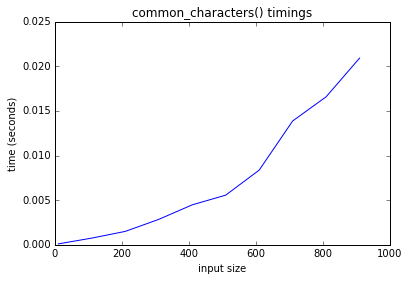

In [18]:
plt.plot(sizes_slow, times_slow)
plt.title("common_characters() timings")
plt.xlabel("input size")
plt.ylabel("time (seconds)")

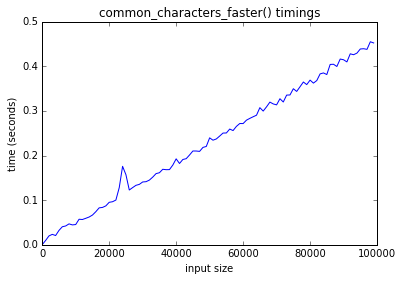

In [19]:
plt.plot(sizes_fast, times_fast)
plt.title("common_characters_faster() timings")
plt.xlabel("input size")
plt.ylabel("time (seconds)")

# Efficiency: sum_to_zero()

In [22]:
mylist = [random.randrange(-1,100000) for i in xrange(10000)]

In [23]:
def sum_to_zero(lst):
    '''
    INPUT: list of ints
    OUTPUT: tuple of two ints

    Return a tupe of two values from the input list that sum to zero.
    If none exist, return None.
    '''

    for i, item1 in enumerate(lst):
        for item2 in lst[i + 1:]:
            if item1 + item2 == 0:
                return item1, item2

%time v = sum_to_zero(mylist)
v

CPU times: user 8.05 s, sys: 113 ms, total: 8.17 s
Wall time: 8.1 s


In [24]:
def sum_to_zero_faster(lst):
    '''
    INPUT: list of ints
    OUTPUT: tuple of two ints

    Return a tupe of two values from the input list that sum to zero.
    If none exist, return None.
    '''
    # Writing this carefully so that it's both fast AND will give the
    # same result as our first (slow) version.
    s = Counter(lst)
    for i in lst:
        if i == 0 and s[i] >= 2:
            return (0, 0)
        elif i != 0 and -i in s:
            return (i, -i)

%time v = sum_to_zero_faster(mylist)
v

CPU times: user 10 ms, sys: 2.75 ms, total: 12.8 ms
Wall time: 10.6 ms


In [25]:
def build_input(n):
    # This input will never have a 'True' result. This will force worst-case runtimes.
    return [random.randrange(1,100000) for i in xrange(n)]

def get_times(samples, func):
    t = Timer(lambda: func(samples))
    return t.timeit(number=10)

sizes_slow = range(10, 2000, 100)
times_slow = [get_times(build_input(n), sum_to_zero) for n in sizes_slow]

sizes_fast = range(10, 10000, 1000)
times_fast = [get_times(build_input(n), sum_to_zero_faster) for n in sizes_fast]

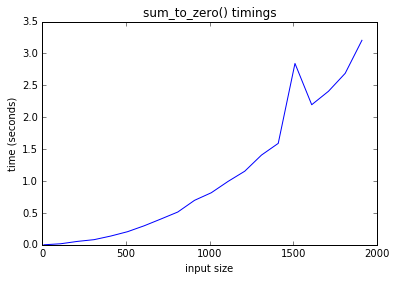

In [26]:
plt.plot(sizes_slow, times_slow)
plt.title("sum_to_zero() timings")
plt.xlabel("input size")
plt.ylabel("time (seconds)")

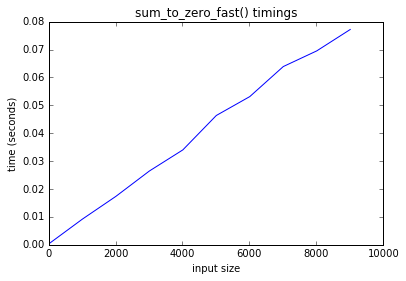

In [27]:
plt.plot(sizes_fast, times_fast)
plt.title("sum_to_zero_fast() timings")
plt.xlabel("input size")
plt.ylabel("time (seconds)")

# Efficiency: substring()

In [28]:
def rand_string(length):
    return "".join(random.choice(string.lowercase) for i in xrange(length))

words = [rand_string(random.randrange(3, 20)) for i in xrange(10000)]
substrings = [rand_string(3) for i in xrange(10000)]

In [29]:
def substring_old(words, substrings):
    '''
    INPUT: list, list
    OUTPUT: list

    Given two lists of strings, return the list of strings from the second list
    that are a substring of a string in the first list.

    The strings in the substrings list are all 3 characters long.
    '''
    ret = []
    for s in substrings:
        for w in words:
            if s in w:
                ret.append(s)
                break
    return ret

%time ret_old = substring_old(words, substrings)

CPU times: user 2.81 s, sys: 24 ms, total: 2.83 s
Wall time: 2.82 s


In [30]:
def substring_new(words, substrings):
    '''
    INPUT: list, list
    OUTPUT: list

    Given two lists of strings, return the list of strings from the second list
    that are a substring of a string in the first list.

    The strings in the substrings list are all 3 characters long.
    '''
    s = set()
    for word in words:
        for i in xrange(len(word) - 2):
            substr = word[i:i+3]
            s.add(substr)
    return [substr for substr in substrings if substr in s]

%time ret_new = substring_new(words, substrings)

CPU times: user 72.3 ms, sys: 18.4 ms, total: 90.6 ms
Wall time: 77.8 ms


In [31]:
ret_old == ret_new

True

# Sorting!

In [32]:
'''
Note:
DON'T EVER IMPLEMENT YOUR OWN SORTING FUNCTION! These impls are just for big-O
learning purposes. For that reason they implement things ground-up.
'''

def selection_sort(values):
    
    for i in xrange(len(values)):
        
        min_index = i
        
        for j in xrange(i+1, len(values)):
            
            if values[j] < values[min_index]:
                min_index = j
        
        values[i], values[min_index] = values[min_index], values[i]  # <-- swap i with min_index

    return values

selection_sort([4, 12, 6, 3, 2, 8, 2, 0, 1])

[0, 1, 2, 2, 3, 4, 6, 8, 12]

In [33]:
def merge(a, b):
    '''
    Merge two pre-sorted lists: a and b.
    Return a merged (still sorted) lists.
    '''
    
    i, j = 0, 0
    
    res = []
    
    while i < len(a) and j < len(b):
        
        if a[i] < b[j]:
            res.append(a[i])
            i += 1
        else:
            res.append(b[j])
            j += 1
            
    while i < len(a):
        res.append(a[i])
        i += 1

    while j < len(b):
        res.append(b[j])
        j += 1
        
    return res


merge([1, 4, 7, 9, 12], [5, 8, 9, 9, 10, 30])

[1, 4, 5, 7, 8, 9, 9, 9, 10, 12, 30]

In [34]:
def merge_sort(values):
    
    if len(values) <= 1:
        return values

    mid_index = len(values) / 2
    
    left_sorted_values = merge_sort(values[:mid_index])
    right_sorted_values = merge_sort(values[mid_index:])
    
    return merge(left_sorted_values, right_sorted_values)

merge_sort([4, 12, 6, 3, 2, 8, 2, 0, 1])

[0, 1, 2, 2, 3, 4, 6, 8, 12]

In [35]:
def build_input(n):
    return [random.randrange(1,10000) for i in xrange(n)]

def get_times(samples, func):
    t = Timer(lambda: func(samples))
    return t.timeit(number=10)

sizes_slow = range(10, 2000, 100)
times_slow = [get_times(build_input(n), selection_sort) for n in sizes_slow]

sizes_fast = range(10, 10000, 1000)
times_fast = [get_times(build_input(n), merge_sort) for n in sizes_fast]

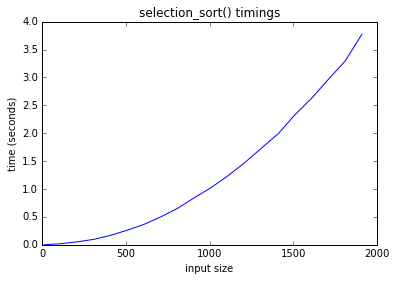

In [36]:
plt.plot(sizes_slow, times_slow)
plt.title("selection_sort() timings")
plt.xlabel("input size")
plt.ylabel("time (seconds)")

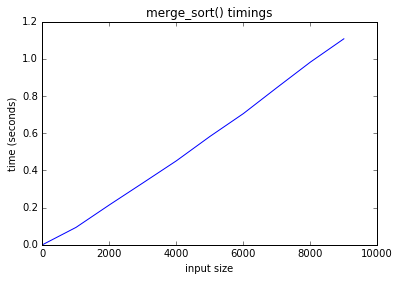

In [37]:
plt.plot(sizes_fast, times_fast)
plt.title("merge_sort() timings")
plt.xlabel("input size")
plt.ylabel("time (seconds)")